In [1]:
from main import *

## Gun Modelv2 small 0.001

OCC_Gun_modelv2_30/al_0.01_mu_1,100_sig_3.5e7,4.5e6/1e1-1e8_40_el_32925_ord_4_POD_13_1e-6/Data/
Opening files from this path =  OCC_Gun_modelv2_30/al_0.01_mu_1,100_sig_3.5e7,4.5e6/1e1-1e8_40_el_32925_ord_4_POD_13_1e-6/Data/
6
R [-2.04010341e-03 -2.09137519e-05 -9.79529743e-05] [[ 9.99999923e-01  3.91286901e-04 -2.66297171e-07]
 [ 3.23299439e-07 -1.45678902e-04  9.99999989e-01]
 [-3.91286858e-04  9.99999913e-01  1.45679017e-04]] 1
Rtilde [0.00627067 0.00074241 0.00066536] [[ 9.99999979e-01  2.06484451e-04  6.72863888e-06]
 [ 5.37365101e-06  6.56147780e-03 -9.99978473e-01]
 [ 2.06524156e-04 -9.99978452e-01 -6.56147655e-03]] 1
I [2.39497472e-03 5.49512567e-05 2.21123583e-04] [[-9.99999772e-01  6.75723432e-04 -7.47100648e-06]
 [ 7.50099366e-06  4.43753626e-05 -9.99999999e-01]
 [ 6.75723099e-04  9.99999771e-01  4.43804211e-05]] 1
7
R [-2.87687360e-03 -3.51341253e-05 -1.70936915e-04] [[ 9.99999914e-01 -4.15758740e-04 -2.98266817e-06]
 [-2.95123461e-06  7.56058742e-05 -9.99999997e-01]
 [-4.15

/Users/cgledger/Coding/Rodrigues_Angles/Rodrigues_Angles/src/Fmeasure.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  Fexactconst[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
/Users/cgledger/Coding/Rodrigues_Angles/Rodrigues_Angles/src/Commeasure.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  Comexactconst[n] = np.abs(np.linalg.norm(Z,ord='fro')**2 ) / np.abs(normalisation)


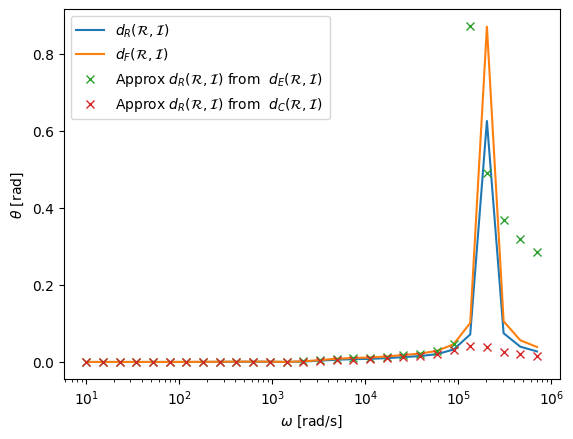

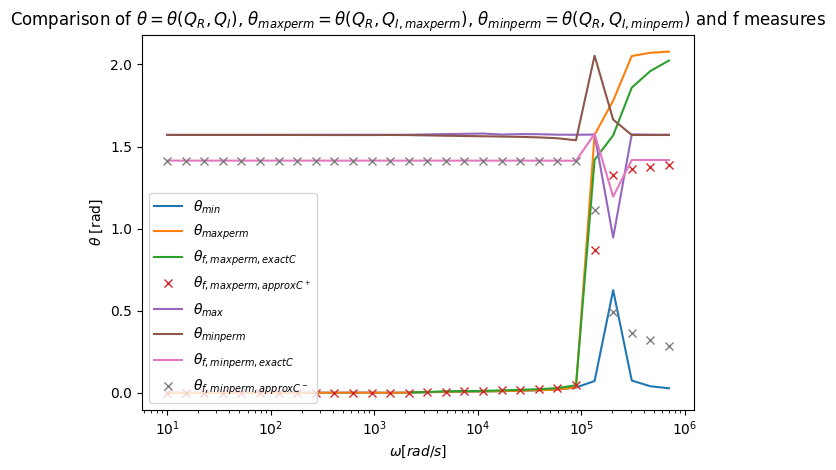

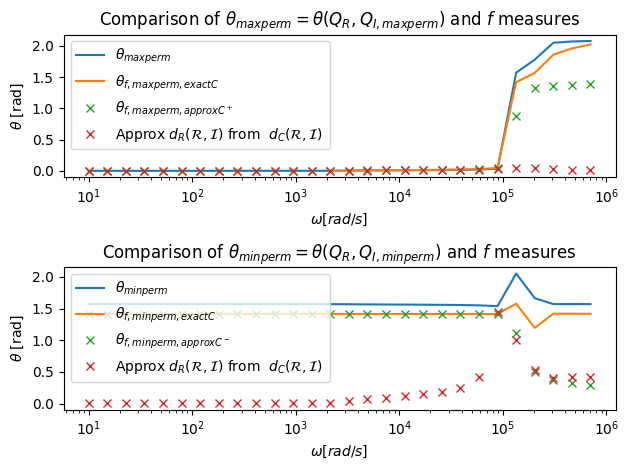

error different multiplicties for R and I 2.0 1.0
0.0005500860226670637
error different multiplicties for R and I 2.0 1.0
0.0005532459024419483
6 1.0
[0.00066536 0.00627067 0.00074241] [5.49512567e-05 2.39497472e-03 2.21123583e-04]
[[ 6.72863888e-06  9.99999979e-01  2.06484451e-04]
 [-9.99978473e-01  5.37365101e-06  6.56147780e-03]
 [-6.56147655e-03  2.06524156e-04 -9.99978452e-01]] [[ 6.75723432e-04  9.99999772e-01 -7.47100648e-06]
 [ 4.43753626e-05 -7.50099366e-06 -9.99999999e-01]
 [ 9.99999771e-01 -6.75723099e-04  4.43804211e-05]]
0.0066645546910529515 1.5774024213244346
0.00942510363126432 2.006595172406015
7 1.0
[0.00059238 0.0054339  0.00072819] [7.09432980e-05 2.45537623e-03 2.80867017e-04]
[[ 9.19863279e-06  9.99999947e-01  3.25766635e-04]
 [-9.99993097e-01  7.98815972e-06  3.71557386e-03]
 [-3.71557106e-03  3.25798564e-04 -9.99993044e-01]] [[ 8.43459509e-04  9.99999644e-01 -9.81105052e-06]
 [ 7.71898081e-05 -9.87616048e-06 -9.99999997e-01]
 [ 9.99999641e-01 -8.43458749e-04  7.

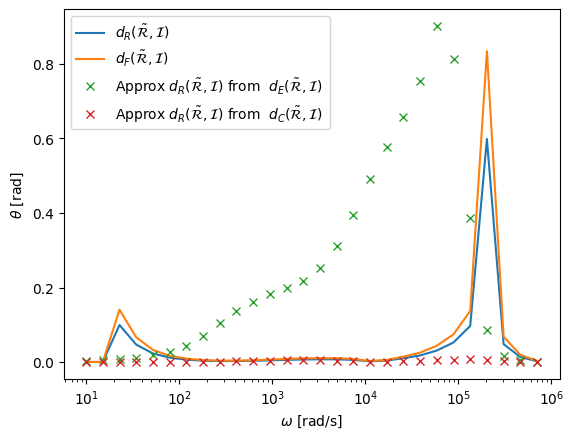

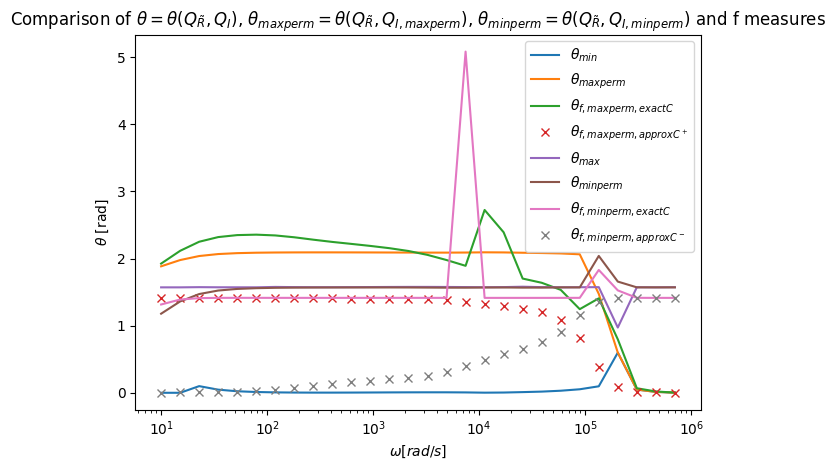

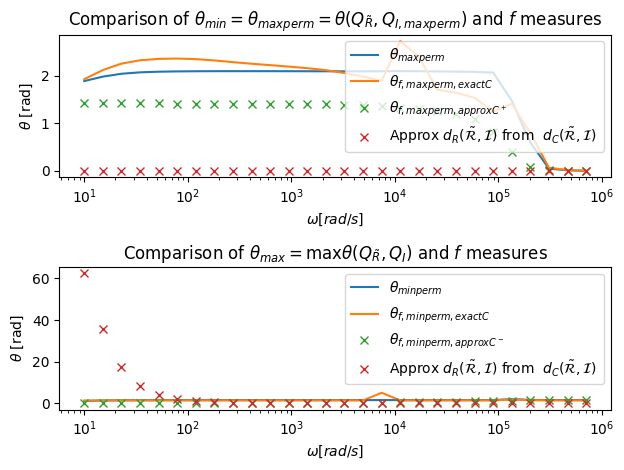

error different multiplicties for R and I 2.0 1.0
0.0005484690695856424
error different multiplicties for R and I 2.0 1.0
0.0005495728318496888
error different multiplicties for R and I 2.0 1.0
0.0005519109077725586
error different multiplicties for R and I 2.0 1.0
0.000557125069209841
error different multiplicties for R and I 2.0 1.0
0.000569523987821522
error different multiplicties for R and I 2.0 1.0
0.000600492274807842
error different multiplicties for R and I 2.0 1.0
0.0006755227446441077
6 2
[0.00831077 0.00076282 0.00076381] [2.39497472e-03 5.49512567e-05 2.21123583e-04]
[[ 9.99999999e-01  6.75723432e-04 -7.47100648e-06]
 [ 4.08543304e-06  4.43753626e-05 -9.99999999e-01]
 [ 4.65903055e-05  9.99999771e-01  4.43804211e-05]] [[-9.99999772e-01  6.75723432e-04 -7.47100648e-06]
 [ 7.50099366e-06  4.43753626e-05 -9.99999999e-01]
 [ 6.75723099e-04  9.99999771e-01  4.43804211e-05]]
0.0006755227446441077 1.5709767001620332
0.0007224063619970754 1.9999998695322578
error different multipl

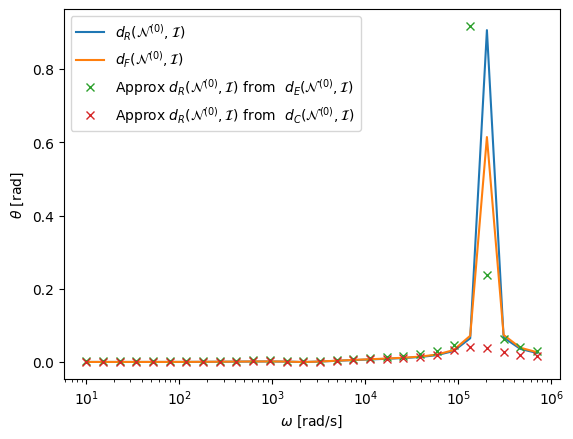

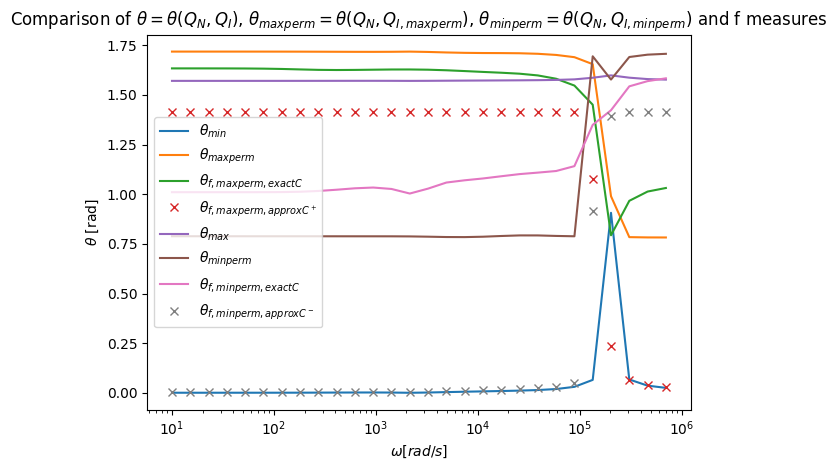

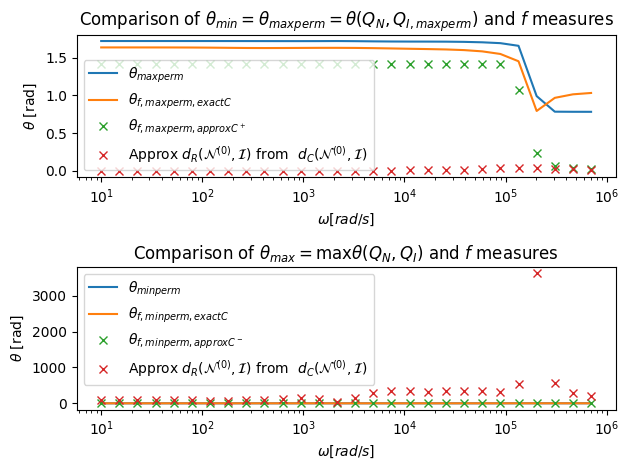

In [2]:
DirList=["OCC_Gun_modelv2_30/al_0.01_mu_1,100_sig_3.5e7,4.5e6/1e1-1e8_40_el_32925_ord_4_POD_13_1e-6/Data/"]
#DirList=["OCC_Gun_modelv2/al_0.01_mu_1,100_sig_3.5e7,4.5e6/1e1-1e8_40_el_25735_ord_5_POD_13_1e-6/Data/"]
SaveRIList=[]
SaveRtilde=[]

MaxOmega=1e6
for directory in DirList:
    print(directory)
    RIResults,RtildeIResults, N0IResults=main(directory,MaxOmega,Figures="On")

dict_keys(['Frequencies', 'MinAnglestoreRI', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRIfmeasapprxconstsortedmindiff_min', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRIfmeasapprxconstsortedmindiff_max', 'dFMinAnglestoreRI', 'dFMaxAnglestoreRI', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRIcommeasapprxconstsortedmindiff_min', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRIcommeasapprxconstsortedmindiff_max'])


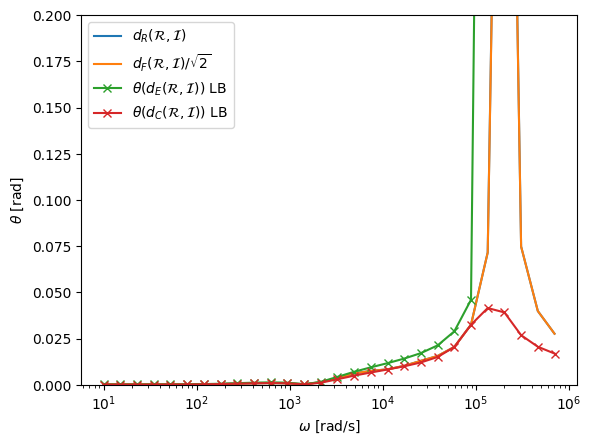

In [3]:
print(RIResults.keys())

Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIcommeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

AnglestoreRIfmeasupper=np.fmax(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])
AnglestoreRIfmeaslower=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])

AnglestoreRIfmeasupper=np.fmax(AnglestoreRIfmeasupper,RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIfmeaslower=np.fmin(AnglestoreRIfmeaslower,RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIfmeasavg=(AnglestoreRIfmeasupper+AnglestoreRIfmeaslower)/2

AnglestoreRIcommmupper=np.fmax(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
AnglestoreRIcommmlower=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2

AnglestoreRIcommmupper=np.fmax(AnglestoreRIcommmupper,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
AnglestoreRIcommmlower=np.fmin(AnglestoreRIcommmlower,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeaslower,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ LB')


plt.semilogx(Frequencies,AnglestoreRIcommmlower,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ LB')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,0.2)
plt.legend()
#plt.savefig("OCC_dualbar_dRanddE_metrics_al_0.001_mu_1,1_sig_1e6,1e8_ord4.pdf")
plt.show()

dict_keys(['Frequencies', 'MinAnglestoreRtildeI', 'AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRtildeIfmeasapprxconstsortedmindiff_min', 'AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRtildeIfmeasapprxconstsortedmindiff_max', 'AnglestoreRtildeIfmeasfullconstsortedmindiff', 'AnglestoreRtildeIfmeasfullconstsortedmaxdiff', 'dFMinAnglestoreRtildeI', 'dFMaxAnglestoreRtildeI', 'AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRtildeIcommeasapprxconstsortedmindiff_min', 'AnglestoreRtildeIcommeasapprxconstsortedmindiff_max'])


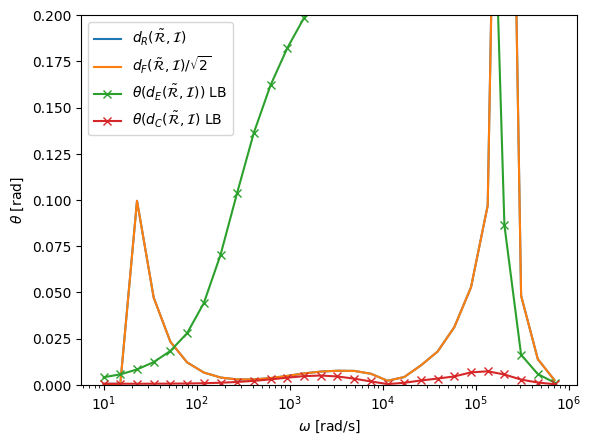

In [4]:
print(RtildeIResults.keys())

Frequencies=RtildeIResults["Frequencies"]
MinAnglestoreRtildeI=RtildeIResults["MinAnglestoreRtildeI"]
#AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"]
dFMinAnglestoreRtildeI = RtildeIResults["dFMinAnglestoreRtildeI"]
#AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIfmeasupper=np.fmax(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIfmeaslower=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])

AnglestoreRtildeIfmeasupper=np.fmax(AnglestoreRtildeIfmeasupper,RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"])
AnglestoreRtildeIfmeaslower=np.fmin(AnglestoreRtildeIfmeaslower,RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"])

AnglestoreRtildeIfmeasavg=(AnglestoreRtildeIfmeasupper+AnglestoreRtildeIfmeaslower)/2

AnglestoreRtildeIfmeasfullconstsortedmindiff= RtildeIResults["AnglestoreRtildeIfmeasfullconstsortedmindiff"]

AnglestoreRtildeIcommmupper=np.fmax(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"])
AnglestoreRtildeIcommmlower=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"])

AnglestoreRtildeIcommmupper=np.fmax(AnglestoreRtildeIcommmupper,RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIcommmlower=np.fmin(AnglestoreRtildeIcommmlower,RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])


AnglestoreRtildeIcommmavg = (AnglestoreRtildeIcommmupper+AnglestoreRtildeIcommmlower )/2

AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRtildeI/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeaslower,'-x',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreRtildeIcommmlower,'-x',label=r'$\theta(d_C(\tilde{\cal R},{\cal I})$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,0.2)
plt.legend()
#plt.savefig("OCC_dualbar_dRanddE_metrics_tilde_al_0.001_mu_1,1_sig_1e6,1e8_ord4.pdf")
plt.show()

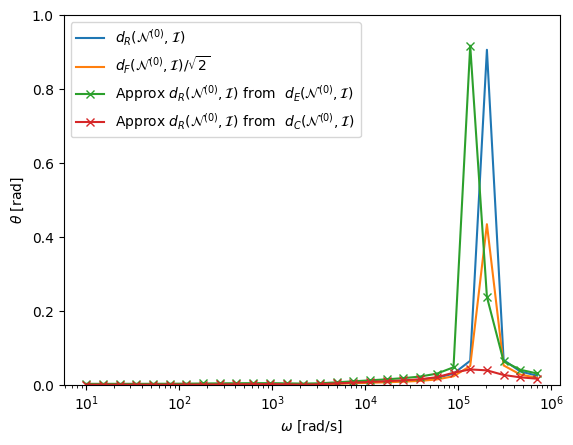

In [5]:
Frequencies=N0IResults["Frequencies"]
MinAnglestoreN0I=N0IResults["MinAnglestoreN0I"]
AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
AnglestoreN0Icommeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreN0I = N0IResults["dFMinAnglestoreN0I"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0I,label=r'$d_R({\cal N}^{(0)},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0I/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max,'x-',label=r'Approx $d_R({\cal N}^{(0)},{\cal I})$ from  $d_E({\cal N}^{(0)},{\cal I})$ ')
plt.semilogx(Frequencies,AnglestoreN0Icommeasapprxconstsortedmaxdiff_max,'x-',label=r'Approx $d_R({\cal N}^{(0)},{\cal I})$ from  $d_C({\cal N}^{(0)},{\cal I})$ ')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,1.0)
plt.legend()

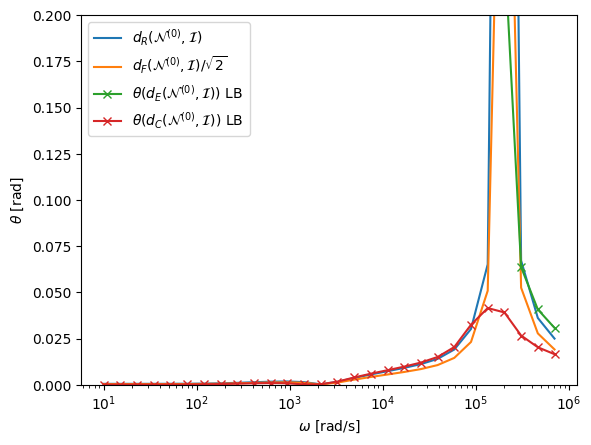

In [8]:
Frequencies=RIResults["Frequencies"]
MinAnglestoreN0I=N0IResults["MinAnglestoreN0I"]
AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
AnglestoreN0Icommeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])

AnglestoreN0Ifmeasupper=np.fmax(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_min"])
AnglestoreN0Ifmeaslower=np.fmin(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_min"])

AnglestoreN0Ifmeasupper=np.fmax(AnglestoreN0Ifmeasupper,N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
AnglestoreN0Ifmeaslower=np.fmin(AnglestoreN0Ifmeaslower,N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
AnglestoreN0Ifmeasavg=(AnglestoreN0Ifmeasupper+AnglestoreN0Ifmeaslower)/2

AnglestoreN0Icommmupper=np.fmax(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_min"])
AnglestoreN0Icommmlower=np.fmin(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_min"])
AnglestoreN0Icommmavg = (AnglestoreN0Icommmupper+AnglestoreRIcommmlower )/2

AnglestoreN0Icommmupper=np.fmax(AnglestoreRIcommmupper,N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])
AnglestoreN0Icommmlower=np.fmin(AnglestoreRIcommmlower,N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])
AnglestoreN0Icommmavg = (AnglestoreN0Icommmupper+AnglestoreN0Icommmlower )/2



dFMinAnglestoreN0I = N0IResults["dFMinAnglestoreN0I"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0I,label=r'$d_R({\cal N}^{(0)},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0I/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Ifmeaslower,'-x',label=r'$\theta(d_E({\cal N}^{(0)},{\cal I}))$ LB')


plt.semilogx(Frequencies,AnglestoreN0Icommmlower,'-x',label=r'$\theta(d_C({\cal N}^{(0)},{\cal I}))$ LB')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,0.2)
plt.legend()
#plt.savefig("OCC_dualbar_dRanddE_metrics_al_0.001_mu_1,1_sig_1e6,1e8_ord4.pdf")
plt.show()